# The `dataset` Module

In [1]:
from sklearn import datasets
import numpy as np

In [2]:
datasets.*?

In [3]:
boston = datasets.load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
X, y = boston.data, boston.target

# Creating Sample Data

In [5]:
datasets.make_*?

In [6]:
X, y = datasets.make_regression(n_samples=1000, n_features=1,
                                n_informative=1, noise=15,
                                bias=1000, random_state=0)

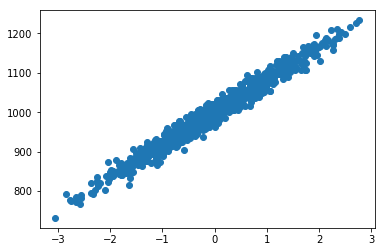

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X, y);

In [8]:
X, y = datasets.make_blobs(n_samples=300, centers=4,
                           cluster_std=0.6, random_state=0)

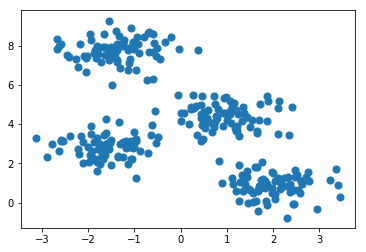

In [9]:
plt.scatter(X[:, 0], X[:, 1], s=50);

# Scaling Data

In [10]:
from sklearn import preprocessing

X, y = boston.data, boston.target
X[:, :3].mean(axis=0)

array([  3.59376071,  11.36363636,  11.13677866])

In [11]:
X[:, :3].std(axis=0)

array([  8.58828355,  23.29939569,   6.85357058])

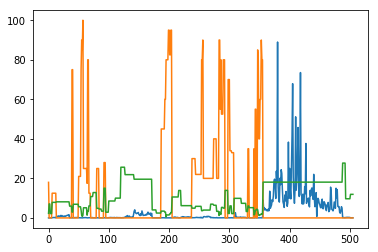

In [12]:
plt.plot(X[:, :3]);

### `preprocessing.scale`

`scale` centers and scales the data using the following formula:
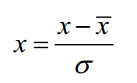

In [13]:
X_2 = preprocessing.scale(X[:, :3])

In [14]:
X_2.mean(axis=0)

array([  6.34099712e-17,  -6.34319123e-16,  -2.68291099e-15])

In [15]:
X_2.std(axis=0)

array([ 1.,  1.,  1.])

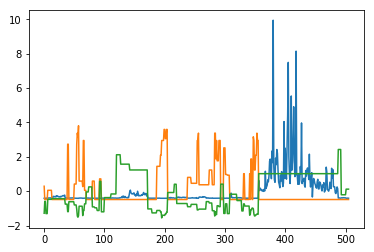

In [16]:
plt.plot(X_2);

### `StandardScaler`

Same as `preprocessing.scale` but persists scale settings across uses.

In [17]:
scaler = preprocessing.StandardScaler()
scaler.fit(X[:, :3])
X_3 = scaler.transform(X[:, :3])
X_3.mean(axis=0)

array([  6.34099712e-17,  -6.34319123e-16,  -2.68291099e-15])

In [18]:
X_3.std(axis=0)

array([ 1.,  1.,  1.])

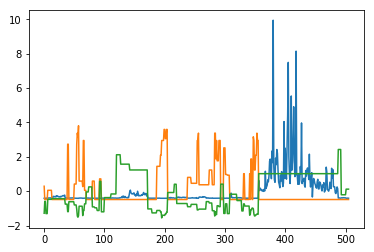

In [19]:
plt.plot(X_3);

### `MinMaxScaler`

Scales data within a specified range.

In [20]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X[:, :3])
X_4 = scaler.transform(X[:, :3])
X_4.max(axis=0)

array([ 1.,  1.,  1.])

In [21]:
X_4.std(axis=0)

array([ 0.09653024,  0.23299396,  0.25123059])

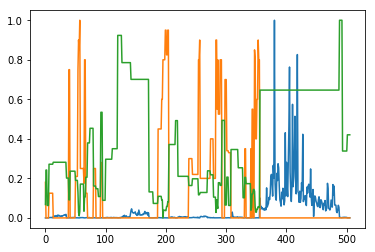

In [22]:
plt.plot(X_4);

In [23]:
scaler = preprocessing.MinMaxScaler(feature_range=(-4, 4))
scaler.fit(X[:, :3])
X_5 = scaler.transform(X[:, :3])

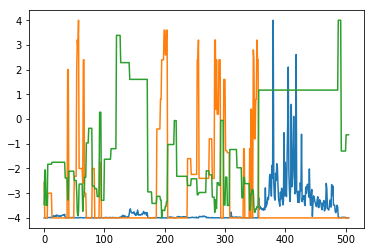

In [24]:
plt.plot(X_5);

# Binarizing Data

### `preprocessing.binarize`

In [25]:
new_target = preprocessing.binarize(boston.target, threshold=boston.target.mean())
new_target[:, :5]

C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 1.,  0.,  1.,  1.,  1.]])

In [26]:
(boston.target[:5] > boston.target.mean()).astype(int)

array([1, 0, 1, 1, 1])

### `Binarizer`

In [27]:
bin = preprocessing.Binarizer(boston.target.mean())
new_target = bin.fit_transform(boston.target)
new_target[:, :5]

C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 1.,  0.,  1.,  1.,  1.]])

# Working with Categorical Variables

### `OneHotEncoder`

In [28]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [29]:
d = np.column_stack((X, y))

In [30]:
encoder = preprocessing.OneHotEncoder()
encoder.fit_transform(d[:, -1:]).toarray()[:5]

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

### `DictVectorizer`

In [31]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer()
dict = [{'species': iris.target_names[i]} for i in y]
dv.fit_transform(dict).toarray()[:5]

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

### Patsy

In [32]:
import patsy
patsy.dmatrix('0 + C(species)', {'species': iris.target})

DesignMatrix with shape (150, 3)
  C(species)[0]  C(species)[1]  C(species)[2]
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
 

# Binarizing Label Features

### `LabelBinarizer`

In [33]:
from sklearn.preprocessing import LabelBinarizer

binarizer = LabelBinarizer()
new_target = binarizer.fit_transform(y)
y.shape, new_target.shape

((150,), (150, 3))

In [34]:
new_target[:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [35]:
new_target[-5:]

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [36]:
binarizer.classes_

array([0, 1, 2])

### `LabelBinarizer` and labels

In [37]:
binarizer = LabelBinarizer(neg_label=-1000, pos_label=1000)
binarizer.fit_transform(y)[:5]

array([[ 1000, -1000, -1000],
       [ 1000, -1000, -1000],
       [ 1000, -1000, -1000],
       [ 1000, -1000, -1000],
       [ 1000, -1000, -1000]])

# Inputing Missing Values through Various Strategies

In [38]:
iris = datasets.load_iris()
iris_X = iris.data
masking_array = np.random.binomial(1, .25, iris_X.shape).astype(bool)
iris_X[masking_array] = np.nan

In [39]:
masking_array[:5]

array([[False, False,  True, False],
       [False,  True, False,  True],
       [False, False, False, False],
       [False, False, False, False],
       [False,  True,  True, False]], dtype=bool)

In [40]:
iris_X[:5]

array([[ 5.1,  3.5,  nan,  0.2],
       [ 4.9,  nan,  1.4,  nan],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  nan,  nan,  0.2]])

By default, Imputer fills in missing values with the mean.

In [41]:
impute = preprocessing.Imputer()
iris_X_prime = impute.fit_transform(iris_X)
iris_X_prime[:5]

array([[ 5.1       ,  3.5       ,  3.84513274,  0.2       ],
       [ 4.9       ,  3.04901961,  1.4       ,  1.16465517],
       [ 4.7       ,  3.2       ,  1.3       ,  0.2       ],
       [ 4.6       ,  3.1       ,  1.5       ,  0.2       ],
       [ 5.        ,  3.04901961,  3.84513274,  0.2       ]])

In [42]:
impute = preprocessing.Imputer(strategy='median')
iris_X_prime = impute.fit_transform(iris_X)
iris_X_prime[:5]

array([[ 5.1,  3.5,  4.4,  0.2],
       [ 4.9,  3. ,  1.4,  1.3],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3. ,  4.4,  0.2]])

In [43]:
iris_X[np.isnan(iris_X)] = -1
iris_X[:5]

array([[ 5.1,  3.5, -1. ,  0.2],
       [ 4.9, -1. ,  1.4, -1. ],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. , -1. , -1. ,  0.2]])

In [44]:
impute = preprocessing.Imputer(missing_values=-1)
iris_X_prime = impute.fit_transform(iris_X)
iris_X_prime[:5]

array([[ 5.1       ,  3.5       ,  3.84513274,  0.2       ],
       [ 4.9       ,  3.04901961,  1.4       ,  1.16465517],
       [ 4.7       ,  3.2       ,  1.3       ,  0.2       ],
       [ 4.6       ,  3.1       ,  1.5       ,  0.2       ],
       [ 5.        ,  3.04901961,  3.84513274,  0.2       ]])

# Using Pipelines for Multiple Preprocessing Steps

In [45]:
mat = datasets.make_spd_matrix(10)
masking_array = np.random.binomial(1, .1, mat.shape).astype(bool)
mat[masking_array] = np.nan
mat[:4, :4]

array([[ 0.37587746,  0.08047308,  0.01226786, -0.08448386],
       [ 0.08047308,  0.50536722,  0.59754188, -0.23133298],
       [ 0.01226786,  0.59754188,  4.02138964, -1.70156591],
       [-0.08448386, -0.23133298, -1.70156591,  1.47584364]])

How to create a pipeline:

In [46]:
from sklearn import pipeline

pipe = pipeline.Pipeline([('impute', impute), ('scaler', scaler)])
pipe

Pipeline(steps=[('impute', Imputer(axis=0, copy=True, missing_values=-1, strategy='mean', verbose=0)), ('scaler', MinMaxScaler(copy=True, feature_range=(-4, 4)))])

In [47]:
new_mat = pipe.fit_transform(mat)
new_mat[:4, :4]

array([[ 4.        , -0.94028648, -1.60426758, -0.83089169],
       [-0.28474978,  3.11932569, -0.78612526, -0.0977672 ],
       [-1.27404554,  4.        ,  4.        ,  3.77694164],
       [-2.6773996 , -3.91940897, -4.        , -4.        ]])

To be included in Pipeline, objects should have `fit`, `transform`, and `fit_transform` methods. 

# Reducing Dimensionality with PCA (Principal Component Analysis)

In [48]:
iris = datasets.load_iris()
iris_X = iris.data

In [49]:
from sklearn import decomposition

pca = decomposition.PCA()
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [50]:
iris_pca = pca.fit_transform(iris_X)
iris_pca[:5]

array([[ -2.68420713e+00,   3.26607315e-01,  -2.15118370e-02,
          1.00615724e-03],
       [ -2.71539062e+00,  -1.69556848e-01,  -2.03521425e-01,
          9.96024240e-02],
       [ -2.88981954e+00,  -1.37345610e-01,   2.47092410e-02,
          1.93045428e-02],
       [ -2.74643720e+00,  -3.11124316e-01,   3.76719753e-02,
         -7.59552741e-02],
       [ -2.72859298e+00,   3.33924564e-01,   9.62296998e-02,
         -6.31287327e-02]])

PCA transforms the covariances of the data into column vectors that show certain percentages of the variance:

In [51]:
pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557,  0.01718514,  0.00518309])

High-dimensionality is problematic in data analysis. Consider representing data in fewer dimensions when models overfit on high-dimensional datasets.

In [52]:
pca = decomposition.PCA(n_components=2)
iris_X_prime = pca.fit_transform(iris_X)
iris_X.shape, iris_X_prime.shape

((150, 4), (150, 2))

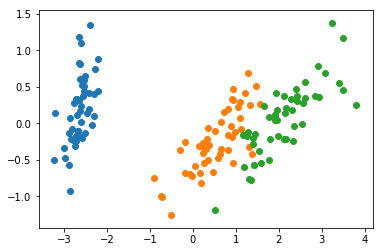

In [53]:
plt.scatter(iris_X_prime[:50, 0], iris_X_prime[:50, 1]);
plt.scatter(iris_X_prime[50:100, 0], iris_X_prime[50:100, 1]);
plt.scatter(iris_X_prime[100:150, 0], iris_X_prime[100:150, 1]);

In [54]:
pca.explained_variance_ratio_.sum()

0.97763177502480336

You can create a PCA with the desired variance to be explained:

In [55]:
pca = decomposition.PCA(n_components=.98)
iris_X_prime = pca.fit(iris_X)
pca.explained_variance_ratio_.sum()

0.99481691454981014

# Using Factor Analysis for Decomposition

Factor analysis differs from PCA in that it makes assumptions about which implicit features underlie the explicit features of a dataset.

In [56]:
from sklearn.decomposition import FactorAnalysis

In [57]:
fa = FactorAnalysis(n_components=2)
iris_two_dim = fa.fit_transform(iris.data)
iris_two_dim[:5]

array([[-1.33125848, -0.55846779],
       [-1.33914102,  0.00509715],
       [-1.40258715,  0.307983  ],
       [-1.29839497,  0.71854288],
       [-1.33587575, -0.36533259]])

# Kernel PCA for Nonlinear Dimensionality Reduction

When data is not lineraly seperable, Kernel PCA can help. Here, data is projected by the kernel function and then PCA is performed.

In [58]:
A1_mean = [1, 1]
A1_cov = [[2, .99], [1, 1]]
A1 = np.random.multivariate_normal(A1_mean, A1_cov, 50)

A2_mean = [5, 5]
A2_cov = [[2, .99], [1, 1]]
A2 = np.random.multivariate_normal(A2_mean, A2_cov, 50)

A = np.vstack((A1, A2))

B_mean = [5, 0]
B_cov = [[.5, -1], [-.9, .5]]
B = np.random.multivariate_normal(B_mean, B_cov, 100)

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: covariance is not positive-semidefinite.
  del sys.path[0]


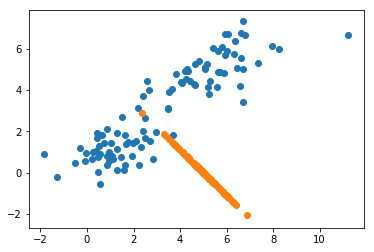

In [59]:
plt.scatter(A[:, 0], A[:, 1]);
plt.scatter(B[:, 0], B[:, 1]);

In [60]:
kpca = decomposition.KernelPCA(kernel='cosine', n_components=1)
AB = np.vstack((A, B))
AB_transformed = kpca.fit_transform(AB)

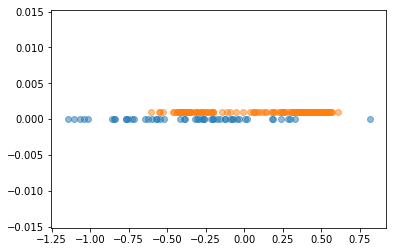

In [61]:
plt.scatter(AB_transformed[:50], np.zeros(AB_transformed[:50].shape), alpha=0.5);
plt.scatter(AB_transformed[50:], np.zeros(AB_transformed[50:].shape)+0.001, alpha=0.5);

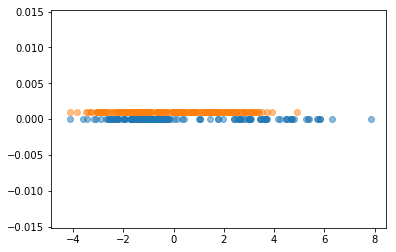

In [62]:
pca = decomposition.PCA(n_components=2)
AB_prime = pca.fit_transform(AB)
plt.scatter(AB_prime[:, 0], np.zeros(AB_prime[:, 0].shape), alpha=0.5);
plt.scatter(AB_prime[:, 1], np.zeros(AB_prime[:, 1].shape)+0.001, alpha=0.5);

# Using Truncated SVD to Reduce Dimensionality

Singular Value Decomposition (SVD) factors a matrix `M` into three matrices: `U`, `Σ`, and `V`. Whereas PCA factors the covariance matrix, SVD factors the data matrix itself.

Given an `n x n` matrix, SVD will create an `n`-column matrix. Truncated SVD will create an arbitrary columned dataset based on the specified number.

In [63]:
iris = datasets.load_iris()
iris_data = iris.data
itis_target = iris.target

In [64]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(2)
iris_transformed = svd.fit_transform(iris_data)
iris_data[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [65]:
iris_transformed[:5]

array([[ 5.91220352,  2.30344211],
       [ 5.57207573,  1.97383104],
       [ 5.4464847 ,  2.09653267],
       [ 5.43601924,  1.87168085],
       [ 5.87506555,  2.32934799]])

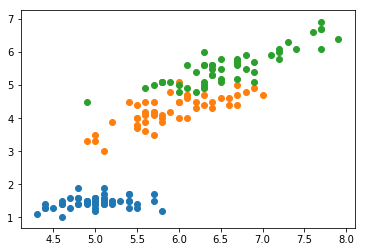

In [66]:
plt.scatter(iris_data[:50, 0], iris_data[:50, 2]);
plt.scatter(iris_data[50:100, 0], iris_data[50:100, 2]);
plt.scatter(iris_data[100:150, 0], iris_data[100:150, 2]);

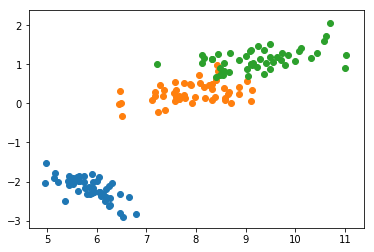

In [67]:
plt.scatter(iris_transformed[:50, 0], -iris_transformed[:50, 1]);
plt.scatter(iris_transformed[50:100, 0], -iris_transformed[50:100, 1]);
plt.scatter(iris_transformed[100:150, 0], -iris_transformed[100:150, 1]);

### How It Works

In [68]:
from scipy.linalg import svd

D = np.array([[1, 2], [1, 3], [1, 4]])
D

array([[1, 2],
       [1, 3],
       [1, 4]])

In [69]:
U, S, V = svd(D, full_matrices=False)
U.shape, S.shape, V.shape

((3, 2), (2,), (2, 2))

In [70]:
np.dot(U.dot(np.diag(S)), V)

array([[ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.]])

In [71]:
new_S = S[0]
new_U = U[:, 0]
new_U.dot(new_S)

array([-2.20719466, -3.16170819, -4.11622173])

# Decomposition to Classify with DictionaryLearning

`DictionaryLearning` assumes that the features are the basis for the resulting datasets.

In [72]:
from sklearn.decomposition import DictionaryLearning

dl = DictionaryLearning(3) # 3 species of iris
transformed = dl.fit_transform(iris_data[::2])
transformed[:5]

array([[ 0.        ,  6.34476574,  0.        ],
       [ 0.        ,  5.83576461,  0.        ],
       [ 0.        ,  6.32038375,  0.        ],
       [ 0.        ,  5.89318572,  0.        ],
       [ 0.        ,  5.45222715,  0.        ]])

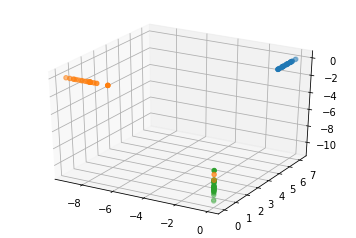

In [73]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transformed[0:25, 0], transformed[0:25, 1], transformed[0:25, 2]);
ax.scatter(transformed[25:50, 0], transformed[25:50, 1], transformed[25:50, 2]);
ax.scatter(transformed[50:75, 0], transformed[50:75, 1], transformed[50:75, 2]);


In [74]:
transformed = dl.transform(iris_data[1::2])

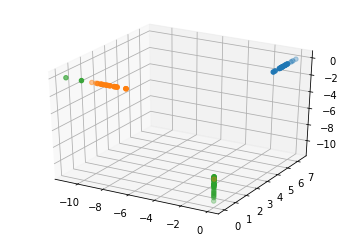

In [75]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transformed[0:25, 0], transformed[0:25, 1], transformed[0:25, 2]);
ax.scatter(transformed[25:50, 0], transformed[25:50, 1], transformed[25:50, 2]);
ax.scatter(transformed[50:75, 0], transformed[50:75, 1], transformed[50:75, 2]);

# Putting it All Together with Pipelines

In [76]:
iris = datasets.load_iris()
iris_data = iris.data

mask = np.random.binomial(1, .25, iris_data.shape).astype(bool)
iris_data[mask] = np.nan
iris_data[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  nan,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  nan],
       [ nan,  3.1,  1.5,  nan],
       [ 5. ,  3.6,  1.4,  0.2]])

In [77]:
pca = decomposition.PCA()
imputer = preprocessing.Imputer()

pipe = pipeline.Pipeline([('imputer', imputer), ('pca', pca)])
iris_data_transformed = pipe.fit_transform(iris_data)
iris_data_transformed[:5]

array([[-2.6926286 ,  0.08076282,  0.262652  ,  0.12609496],
       [-2.72935899, -0.1720479 ,  0.02528327, -0.19048606],
       [-2.56356197,  0.11508148, -0.86245153,  0.27052267],
       [-1.97689431,  0.95776527, -0.4142071 , -0.18932791],
       [-2.73379192,  0.02286896,  0.26297356,  0.24838061]])

In [78]:
pipe2 = pipeline.make_pipeline(imputer, pca)
pipe2.steps

[('imputer',
  Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)),
 ('pca',
  PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False))]

In [79]:
iris_data_transformed2 = pipe2.fit_transform(iris_data)
iris_data_transformed2[:5]

array([[-2.6926286 ,  0.08076282,  0.262652  ,  0.12609496],
       [-2.72935899, -0.1720479 ,  0.02528327, -0.19048606],
       [-2.56356197,  0.11508148, -0.86245153,  0.27052267],
       [-1.97689431,  0.95776527, -0.4142071 , -0.18932791],
       [-2.73379192,  0.02286896,  0.26297356,  0.24838061]])

# Using Gaussian Processes for Regression

In [108]:
boston = datasets.load_boston()
boston_X = boston.data
boston_y = boston.target

train_set = np.random.choice([True, False], len(boston_y), p=[.75, .25])

In [109]:
from sklearn.gaussian_process import GaussianProcess

gp = GaussianProcess()
gp.fit(boston_X[train_set], boston_y[train_set])

C:\tools\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\tools\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


GaussianProcess(beta0=None,
        corr=<function squared_exponential at 0x000000000C5CF730>,
        normalize=True, nugget=array(2.220446049250313e-15),
        optimizer='fmin_cobyla', random_start=1,
        random_state=<mtrand.RandomState object at 0x00000000060D01F8>,
        regr=<function constant at 0x000000000C5CF400>,
        storage_mode='full', theta0=array([[ 0.1]]), thetaL=None,
        thetaU=None, verbose=False)

In [110]:
test_preds = gp.predict(boston_X[~train_set])

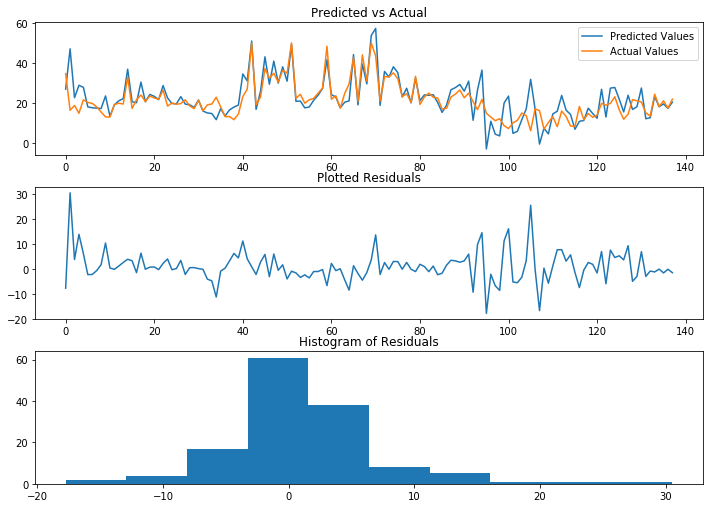

In [111]:
f, ax = plt.subplots(figsize=(10, 7), nrows=3)
f.tight_layout()

ax[0].plot(range(len(test_preds)), test_preds, label='Predicted Values');
ax[0].plot(range(len(test_preds)), boston_y[~train_set], label='Actual Values');
ax[0].set_title('Predicted vs Actual');
ax[0].legend(loc='best');

ax[1].plot(range(len(test_preds)), test_preds - boston_y[~train_set]);
ax[1].set_title('Plotted Residuals');

ax[2].hist(test_preds - boston_y[~train_set]);
ax[2].set_title('Histogram of Residuals');

You can tune `regr` and `thea0` to get different predictions:

C:\tools\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\tools\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


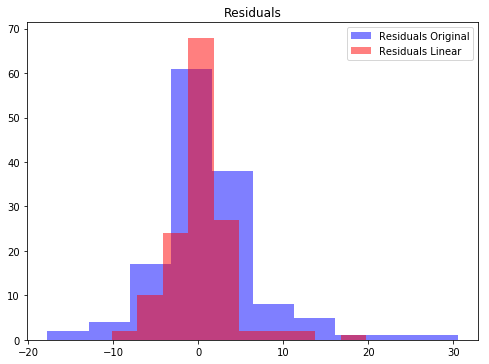

In [112]:
gp = GaussianProcess(regr='linear', theta0=5e-1)
gp.fit(boston_X[train_set], boston_y[train_set]);
linear_preds = gp.predict(boston_X[~train_set])
f, ax = plt.subplots(figsize=(7, 5))

f.tight_layout()

ax.hist(test_preds - boston_y[~train_set], label='Residuals Original', color='b', alpha=.5);
ax.hist(linear_preds - boston_y[~train_set], label='Residuals Linear', color='r', alpha=.5);
ax.set_title('Residuals');
ax.legend(loc='best');

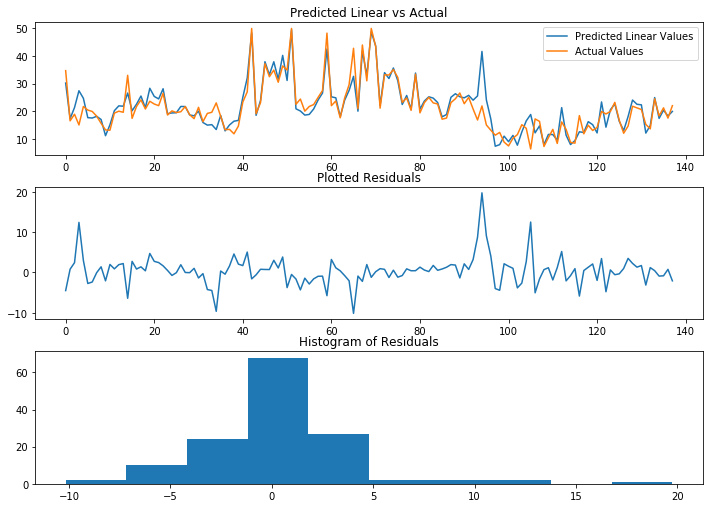

In [114]:
f, ax = plt.subplots(figsize=(10, 7), nrows=3)
f.tight_layout()

ax[0].plot(range(len(linear_preds)), linear_preds, label='Predicted Linear Values');
ax[0].plot(range(len(linear_preds)), boston_y[~train_set], label='Actual Values');
ax[0].set_title('Predicted Linear vs Actual');
ax[0].legend(loc='best');

ax[1].plot(range(len(linear_preds)), linear_preds - boston_y[~train_set]);
ax[1].set_title('Plotted Residuals');

ax[2].hist(linear_preds - boston_y[~train_set]);
ax[2].set_title('Histogram of Residuals');

In [113]:
np.power(test_preds - boston_y[~train_set], 2).mean(), np.power(linear_preds - boston_y[~train_set], 2).mean()

(39.057941598160035, 12.854653855280493)

### Measuring Uncertainty

In [115]:
test_preds, MSE = gp.predict(boston_X[~train_set], eval_MSE=True)
MSE[:5]

array([ 14.57757905,  49.34143487,   6.63401504,   7.24418898,  26.4753024 ])

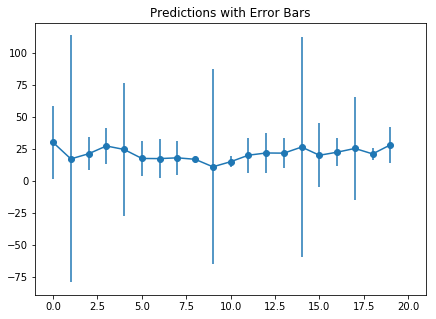

In [119]:
f, ax = plt.subplots(figsize=(7, 5))
n = 20
rng = range(n)
ax.scatter(rng, test_preds[:n]);
ax.errorbar(rng, test_preds[:n], yerr=1.96*MSE[:n]);
ax.set_title('Predictions with Error Bars');
ax.set_xlim((-1, 21));

# Defining the Gaussian Process Object Directly

In [125]:
from sklearn.gaussian_process import regression_models

X, y = datasets.make_regression(1000, 1, 1)

In [126]:
regression_models.constant(X)[:5]

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])

In [128]:
regression_models.linear(X)[:5]

array([[ 1.        ,  0.85496518],
       [ 1.        ,  1.56124722],
       [ 1.        ,  0.44346332],
       [ 1.        ,  0.54509764],
       [ 1.        ,  0.50400804]])

In [129]:
regression_models.quadratic(X)[:5]

array([[ 1.        ,  0.85496518,  0.73096547],
       [ 1.        ,  1.56124722,  2.43749289],
       [ 1.        ,  0.44346332,  0.19665971],
       [ 1.        ,  0.54509764,  0.29713143],
       [ 1.        ,  0.50400804,  0.25402411]])

# Using Stochastic Gradient Descent for Regression

In [130]:
X, y = datasets.make_regression((int(1e6)))

Size of the regression (MB):

In [132]:
X.nbytes / 1e6

800.0

In [133]:
from sklearn import linear_model

sgd = linear_model.SGDRegressor()
train = np.random.choice([True, False], size=len(y), p=[.75, .25])
sgd.fit(X[train], y[train])

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)